In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris_data/iris.data')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


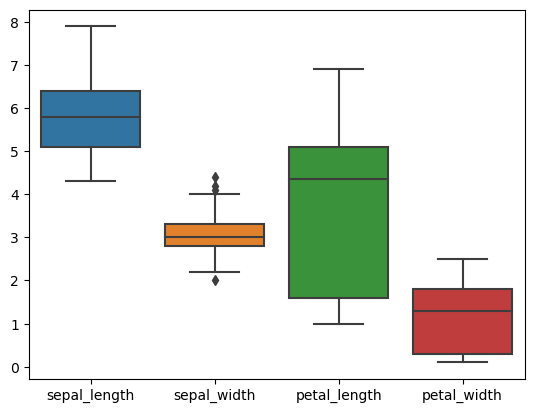

In [4]:
sns.boxplot(data = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.show()

In [5]:
groups = df.groupby('class').groups
setosa = np.array(df.iloc[groups['Iris-setosa'], : -1])
versicolor = np.array(df.iloc[groups['Iris-versicolor'], : -1])
virginica = np.array(df.iloc[groups['Iris-virginica'], : -1])

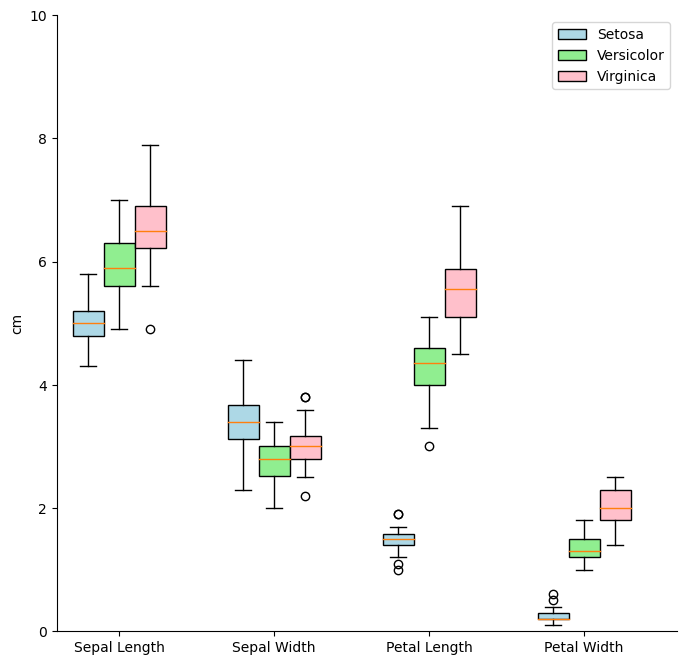

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))
colours = ['lightblue', 'lightgreen', 'pink']

#Setosa
setosa_bplot = ax.boxplot(setosa, positions = [0.25, 1.5, 2.75, 4],
            widths = [0.25, 0.25, 0.25, 0.25],
            patch_artist = True)

for patch in setosa_bplot['boxes']:
    patch.set_facecolor(colours[0])

#Versicolor
versicolor_bplot = ax.boxplot(versicolor, positions = [0.5, 1.75, 3, 4.25],
            widths = [0.25, 0.25, 0.25, 0.25],
            patch_artist = True)

for patch in versicolor_bplot['boxes']:
    patch.set_facecolor(colours[1])

#Virginica
virginica_bplot = ax.boxplot(virginica, positions = [0.75, 2, 3.25, 4.5],
            widths = [0.25, 0.25, 0.25, 0.25],
            patch_artist = True)

for patch in virginica_bplot['boxes']:
    patch.set_facecolor(colours[2])

ax.legend(handles=[setosa_bplot['boxes'][0], versicolor_bplot['boxes'][0], virginica_bplot['boxes'][0]], labels = ['Setosa', 'Versicolor', 'Virginica'])

ax.set_xlim([0, 5])
ax.set_ylim([0, 10])

ax.set_ylabel('cm')

ax.set_xticks(ticks = [0.5, 1.75, 3, 4.25], labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

ax.spines[['top', 'right']].set_color(None)

plt.savefig('iris_data/iris_boxplot.png', dpi = 256)
plt.show()